# PHYS 512 - Final Project

**André Vallières (260742187)**

## Part 0

In [1]:
# Imports
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [95]:
class NBody:
    def __init__(self, nparticles, m=1.0, v=0.0, pos_init=None, ngrid=512, soft=0.03, G=1, dt=0.01):
        # Parameters
        self.nparticles = nparticles
        self.ngrid = ngrid
        self.soft = soft
        self.G = G
        self.dt = dt
        
        # Particles
        if pos_init is not None:
            self.pos = pos_init
            
            assert(pos_init.shape[1] == nparticles)
        else:
            # Centered around middle of grid
            self.pos = (ngrid//3 * np.random.randn(3, nparticles) + ngrid//2) % (ngrid - 1)
        
        if isinstance(m, np.ndarray):
            self.masses = m
        else:
            self.masses = m * np.ones((1, nparticles))
            
        if isinstance(v, np.ndarray):
            self.vels = v
        else:
            self.vels = v * np.ones((3, nparticles))

    def get_kernel(self):
        # Set up the grid
        n = self.ngrid
        
        x = np.arange(n)
        x[n//2:] = x[n//2:] - n
        xx,yy,zz = np.meshgrid(x, x, x)

        # Set up initial guess for potential
        r = np.sqrt(xx**2 + yy**2 + zz**2 + self.soft**2)
        #rsqr[rsqr < self.soft**2] = self.soft**2
        #r = np.sqrt(rsqr + self.soft**2)
        #r[0,0,0] = 1
        kernel = -self.G / (4 * np.pi * r)# - 1/self.soft**2

        # Compute V[0,0,0]
        #kernel[0,0,0] = 6 * kernel[1,0,0] - kernel[2,0,0] - kernel[1,1,0] - kernel[1,-1,0] - kernel[1,0,1] - kernel[1,0,-1]

        # Compute rho
        def average(pot):
            return (np.roll(pot,1,0) + np.roll(pot,-1,0) + np.roll(pot,1,1) + np.roll(pot,-1,1) + np.roll(pot,1,2) + np.roll(pot,-1,2)) / 6
        def compute_rho(pot):
            return pot - average(pot)

        #rho = compute_rho(kernel)

        # Rescale V to rho[0,0,0] = V[0,0,0] = 0
        #kernel = kernel / rho[0,0,0]
        #kernel = kernel - kernel[0,0,0] + 1
        # Set potential at the edges to go to zero
        #kernel = kernel - kernel[n//2, n//2, n//2]
        
        #rho = compute_rho(V)

        return kernel
        
    def get_forces(self):
        # Convolution between density and kernel
        kernel = self.get_kernel()
        kernelft = np.fft.rfftn(kernel)
        self.rho, _ = np.histogramdd(self.pos.T, bins=self.ngrid, weights=self.masses[0])
        rhoft = np.fft.rfftn(self.rho)
        
        self.pot = np.fft.irfftn(rhoft * kernelft) - kernel[0,0,0]
        #print(np.max(np.abs(self.pot)))
        
        # Force is (negative) gradient of potential
        dx,dy,dz = np.gradient(self.pot)
        F = np.array([-dx,-dy,-dz])
        
        return F
    
    def evolve(self):
        # Update positions
        self.pos += self.vels * self.dt
        
        # Get forces
        Fx, Fy, Fz = self.get_forces()
        
        # Update velocities
        idxs = np.rint(self.pos).astype(int) % self.ngrid
        
        Fx = Fx[idxs[0,:],idxs[1,:],idxs[2,:]]
        Fy = Fy[idxs[0,:],idxs[1,:],idxs[2,:]]
        Fz = Fz[idxs[0,:],idxs[1,:],idxs[2,:]]
        
        self.vels += np.array([Fx, Fy, Fz]) * self.dt / self.masses
        
        # Update energy
        self.kin = 0.5 * np.sum(self.masses * self.vels**2)

## Part 1

Let's put a single particle in the grid and let it evolve.

<IPython.core.display.Javascript object>


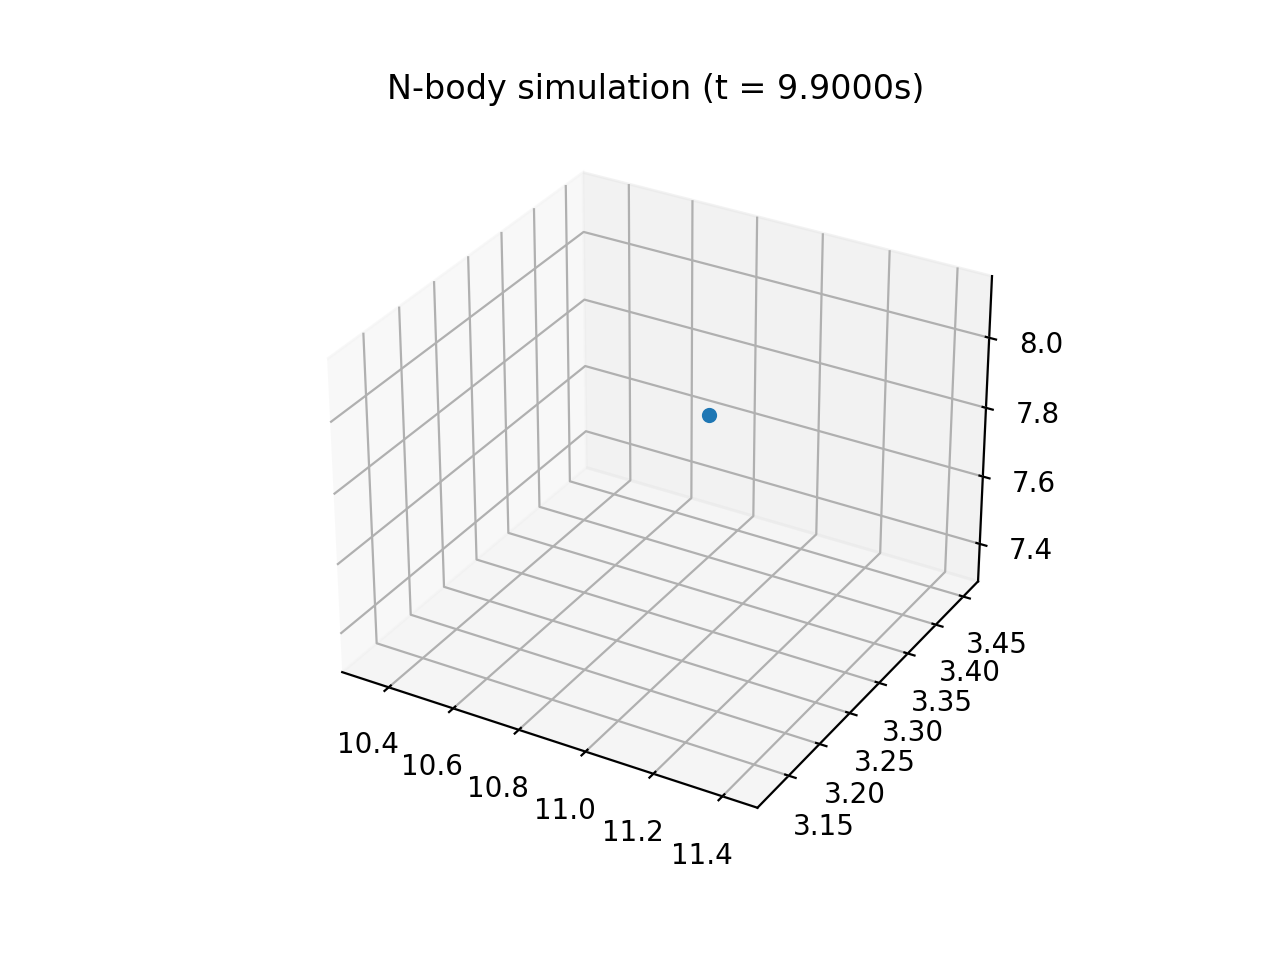

2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.87696909]
 [ 3.28904701]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.87695206]
 [ 3.28907639]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.87692328]
 [ 3.28912604]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.87688276]
 [ 3.28919595]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.6468

2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.86851622]
 [ 3.30362934]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.8680646 ]
 [ 3.30440846]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.86760123]
 [ 3.30520784]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.86712611]
 [ 3.30602748]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.6468

2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.84309714]
 [ 3.34748069]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.84219918]
 [ 3.3490298 ]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.84128947]
 [ 3.35059918]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
[[10.84036801]
 [ 3.35218882]
 [ 7.72985066]]
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.646839388998387
2.6468

In [96]:
nbody = NBody(1, ngrid=16)

time = 0.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('N-body simulation (t = %.4fs)' % time)
graph = ax.scatter(nbody.pos[0,:], nbody.pos[1,:], nbody.pos[2,:])

for _ in range(100):
    graph._offsets3d = (nbody.pos[0,:], nbody.pos[1,:], nbody.pos[2,:])
    ax.set_title('N-body simulation (t = %.4fs)' % time)
    plt.pause(0.01)
    fig.canvas.draw()
    for _ in range(10):
        nbody.evolve()
        time += nbody.dt
    #print(nbody.pos)

<ipython-input-85-e70bdcf6e06b>:42: RuntimeWarning: divide by zero encountered in true_divide
  kernel = -self.G / (4 * np.pi * r)# - 1/self.soft**2
<ipython-input-85-e70bdcf6e06b>:56: RuntimeWarning: invalid value encountered in true_divide
  kernel = kernel / rho[0,0,0]


<IPython.core.display.Javascript object>


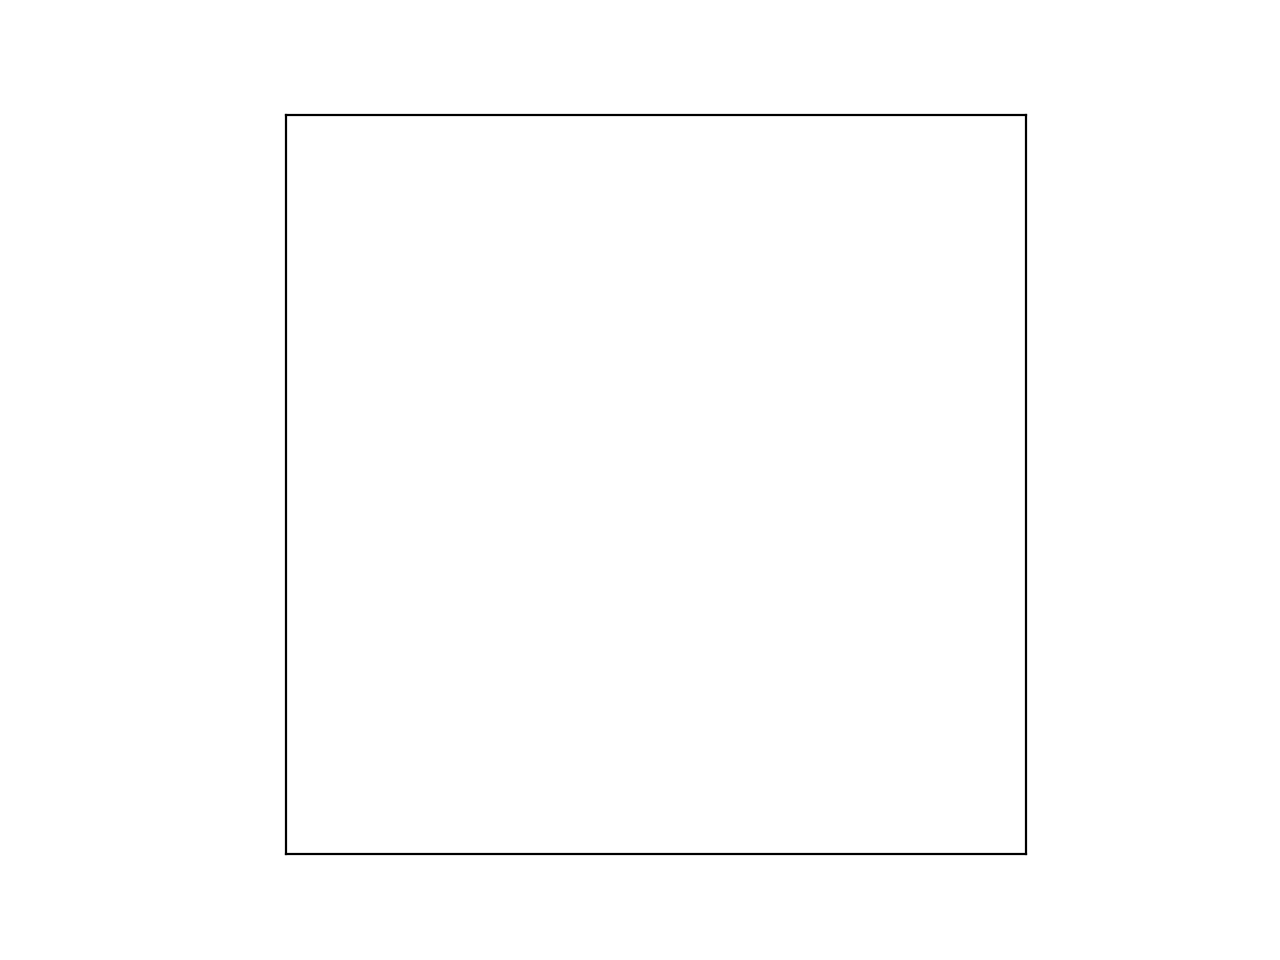

In [87]:
pos_init = np.array([[5.0, 10.0],[5.0, 10.0],[5.0, 10.0]])
nbody = NBody(2, ngrid=64, soft=0.0001, dt=1e-3, pos_init=pos_init)
#np.max(nbody.get_forces())

kernel = nbody.get_kernel()
kernelft = np.fft.rfftn(kernel)
rho, _ = np.histogramdd(nbody.pos.T, bins=nbody.ngrid, weights=nbody.masses[0])
rhoft = np.fft.rfftn(rho)

pot = np.fft.irfftn(rhoft * kernelft) - kernel[0,0,0]
        
x = np.arange(pot.shape[0])
X, Y = np.meshgrid(x, x)

dx,dy,dz = np.gradient(pot)

fig, ax = plt.subplots()
ax.quiver(X, Y, -dx[:,:,0], -dy[:,:,0])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')
plt.show()

In [90]:
nbody.get_kernel()

<ipython-input-85-e70bdcf6e06b>:42: RuntimeWarning: divide by zero encountered in true_divide
  kernel = -self.G / (4 * np.pi * r)# - 1/self.soft**2
<ipython-input-85-e70bdcf6e06b>:56: RuntimeWarning: invalid value encountered in true_divide
  kernel = kernel / rho[0,0,0]


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan